# Exam passing prediction

#### The are 3 subjects which are math, reading and writing. In this project, we are going to predict if a student could pass the exam(Total score is equal to or higher than 180 is considered pass) in terms of the given factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As we can see, there is not any missing values in the data set.

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Quantify test preparation course

df.loc[df['test preparation course']=='completed', 'test preparation course'] = 1
df.loc[df['test preparation course']=='none', 'test preparation course'] = 0

In [7]:
# Quantify lunch type

df.loc[df['lunch']=='standard', 'lunch'] = 1
df.loc[df['lunch']=='free/reduced', 'lunch'] = 0

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1,0,72,72,74
1,female,group C,some college,1,1,69,90,88
2,female,group B,master's degree,1,0,90,95,93
3,male,group A,associate's degree,0,0,47,57,44
4,male,group C,some college,1,0,76,78,75


In [9]:
# Unique values checking
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Quantify parental level of education
df.loc[df['parental level of education']=='some high school', 'parental level of education'] = 1
df.loc[df['parental level of education']=='high school', 'parental level of education'] = 2
df.loc[df['parental level of education']== "associate's degree", 'parental level of education'] = 3
df.loc[df['parental level of education']=='some college', 'parental level of education'] = 4
df.loc[df['parental level of education']=="bachelor's degree", 'parental level of education'] = 5
df.loc[df['parental level of education']=="master's degree", 'parental level of education'] = 6

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5,1,0,72,72,74
1,female,group C,4,1,1,69,90,88
2,female,group B,6,1,0,90,95,93
3,male,group A,3,0,0,47,57,44
4,male,group C,4,1,0,76,78,75


In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [13]:
df.drop(columns=['math score', 'reading score', 'writing score'], axis=1,inplace=True)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score
0,female,group B,5,1,0,218
1,female,group C,4,1,1,247
2,female,group B,6,1,0,278
3,male,group A,3,0,0,148
4,male,group C,4,1,0,229


In [15]:
race = pd.get_dummies(df['race/ethnicity'],drop_first=True)

In [16]:
gender = pd.get_dummies(df['gender'],drop_first=True)

In [17]:
df = pd.concat([df,race,gender],axis=1)

In [18]:
df.drop(columns=['gender','race/ethnicity'],axis=1,inplace=True)

In [19]:
df.loc[df['total score'] >= 180, 'pass'] = 1
df.loc[df['total score'] < 180, 'pass'] = 0

In [20]:
df.head()

,parental level of education,lunch,test preparation course,total score,group B,group C,group D,group E,male,pass
0,5,1,0,218,1,0,0,0,0,1.0
1,4,1,1,247,0,1,0,0,0,1.0
2,6,1,0,278,1,0,0,0,0,1.0
3,3,0,0,148,0,0,0,0,1,0.0
4,4,1,0,229,0,1,0,0,1,1.0


In [21]:
df['pass'] = df['pass'].apply(np.int64)

In [22]:
df.head()

,parental level of education,lunch,test preparation course,total score,group B,group C,group D,group E,male,pass
0,5,1,0,218,1,0,0,0,0,1
1,4,1,1,247,0,1,0,0,0,1
2,6,1,0,278,1,0,0,0,0,1
3,3,0,0,148,0,0,0,0,1,0
4,4,1,0,229,0,1,0,0,1,1


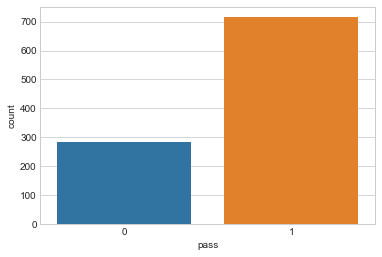

In [23]:
# Visualization

sns.set_style('whitegrid')
sns.countplot(x='pass',data=df)

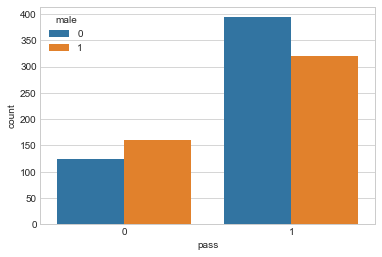

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='pass',hue='male',data=df)

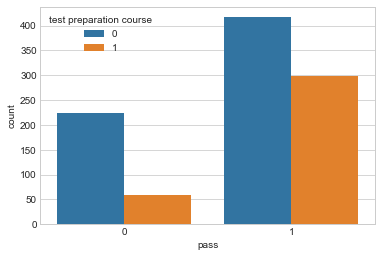

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='pass',hue='test preparation course',data=df)

## Logistic Regression

In [26]:
# Train Test Split
# Logistic Regression
from sklearn.model_selection import train_test_split

In [27]:
y = df['pass']
X = df.drop(['total score','pass'],axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
predictions = lgmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 24  70]
 [ 14 192]]


              precision    recall  f1-score   support

           0       0.63      0.26      0.36        94
           1       0.73      0.93      0.82       206

   micro avg       0.72      0.72      0.72       300
   macro avg       0.68      0.59      0.59       300
weighted avg       0.70      0.72      0.68       300



## KNN

In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [35]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

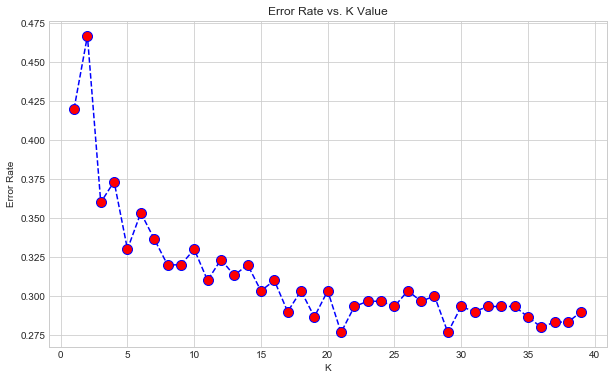

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 33  61]
 [ 65 141]]


              precision    recall  f1-score   support

           0       0.34      0.35      0.34        94
           1       0.70      0.68      0.69       206

   micro avg       0.58      0.58      0.58       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.58      0.58      0.58       300



In [38]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=21


[[ 19  75]
 [  8 198]]


              precision    recall  f1-score   support

           0       0.70      0.20      0.31        94
           1       0.73      0.96      0.83       206

   micro avg       0.72      0.72      0.72       300
   macro avg       0.71      0.58      0.57       300
weighted avg       0.72      0.72      0.67       300



In [39]:
from sklearn.metrics import recall_score
recall_score(y_test,knn_pred)

0.9611650485436893

## SVM

In [40]:
# SVM

from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
model.fit(X_train,y_train)

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
pred_svm = model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[ 15  79]
 [  5 201]]


              precision    recall  f1-score   support

           0       0.75      0.16      0.26        94
           1       0.72      0.98      0.83       206

   micro avg       0.72      0.72      0.72       300
   macro avg       0.73      0.57      0.55       300
weighted avg       0.73      0.72      0.65       300



In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [104]:
grid = GridSearchCV(SVC(),param_grid,cv=10)

In [105]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [107]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
grid_predictions = grid.predict(X_test)

In [109]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 33  61]
 [ 30 176]]


              precision    recall  f1-score   support

           0       0.52      0.35      0.42        94
           1       0.74      0.85      0.79       206

   micro avg       0.70      0.70      0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.67      0.70      0.68       300



## Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtree = DecisionTreeClassifier()

In [59]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
dtree_pred = dtree.predict(X_test)

In [61]:
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[ 37  57]
 [ 55 151]]


              precision    recall  f1-score   support

           0       0.40      0.39      0.40        94
           1       0.73      0.73      0.73       206

   micro avg       0.63      0.63      0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.62      0.63      0.63       300



## RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=200)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rfc_pred = rfc.predict(X_test)

In [67]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[ 34  60]
 [ 40 166]]


              precision    recall  f1-score   support

           0       0.46      0.36      0.40        94
           1       0.73      0.81      0.77       206

   micro avg       0.67      0.67      0.67       300
   macro avg       0.60      0.58      0.59       300
weighted avg       0.65      0.67      0.65       300



## GradientBoosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
params = {
    'n_estimators': 20,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

In [71]:
gbc = GradientBoostingClassifier(**params)

In [72]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=1,
              loss='deviance', max_depth=1, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=20, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
gbc_pred = gbc.predict(X_test)

In [74]:
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

[[ 26  68]
 [ 16 190]]


              precision    recall  f1-score   support

           0       0.62      0.28      0.38        94
           1       0.74      0.92      0.82       206

   micro avg       0.72      0.72      0.72       300
   macro avg       0.68      0.60      0.60       300
weighted avg       0.70      0.72      0.68       300



In [75]:
recall_score(y_test,gbc_pred)

0.9223300970873787

## Xgboost

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [79]:
xgb_pred = xgb.predict(X_test)

In [80]:
print(confusion_matrix(y_test,xgb_pred))
print('\n')
print(classification_report(y_test,xgb_pred))

[[ 32  62]
 [ 30 176]]


              precision    recall  f1-score   support

           0       0.52      0.34      0.41        94
           1       0.74      0.85      0.79       206

   micro avg       0.69      0.69      0.69       300
   macro avg       0.63      0.60      0.60       300
weighted avg       0.67      0.69      0.67       300



## Catboost

In [82]:
from catboost import CatBoostClassifier

In [83]:
catb = CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1)

In [84]:
catb.fit(X_train,y_train)

0:	learn: 0.6567232	total: 78.3ms	remaining: 3.84s
1:	learn: 0.6281669	total: 91.8ms	remaining: 2.2s
2:	learn: 0.6120703	total: 102ms	remaining: 1.6s
3:	learn: 0.5939519	total: 114ms	remaining: 1.31s
4:	learn: 0.5825220	total: 127ms	remaining: 1.14s
5:	learn: 0.5742009	total: 138ms	remaining: 1.01s
6:	learn: 0.5631901	total: 150ms	remaining: 924ms
7:	learn: 0.5568844	total: 164ms	remaining: 860ms
8:	learn: 0.5521579	total: 176ms	remaining: 801ms
9:	learn: 0.5446420	total: 192ms	remaining: 768ms
10:	learn: 0.5408641	total: 205ms	remaining: 726ms
11:	learn: 0.5357974	total: 218ms	remaining: 689ms
12:	learn: 0.5323848	total: 231ms	remaining: 657ms
13:	learn: 0.5283865	total: 243ms	remaining: 625ms
14:	learn: 0.5248572	total: 257ms	remaining: 600ms
15:	learn: 0.5223033	total: 270ms	remaining: 573ms
16:	learn: 0.5200274	total: 284ms	remaining: 551ms
17:	learn: 0.5177592	total: 298ms	remaining: 530ms
18:	learn: 0.5162943	total: 314ms	remaining: 513ms
19:	learn: 0.5139544	total: 328ms	remaini

In [85]:
catb_pred = catb.predict(X_test)

In [86]:
print(confusion_matrix(y_test,catb_pred))
print('\n')
print(classification_report(y_test,catb_pred))

[[ 27  67]
 [ 21 185]]


              precision    recall  f1-score   support

           0       0.56      0.29      0.38        94
           1       0.73      0.90      0.81       206

   micro avg       0.71      0.71      0.71       300
   macro avg       0.65      0.59      0.59       300
weighted avg       0.68      0.71      0.67       300



In [87]:
# SMOTE Oversampling

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(random_state=12,ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

In [90]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 509
Before OverSampling, counts of label '0': 191 

After OverSampling, counts of label '1': 509
After OverSampling, counts of label '0': 509


## KNN after SMOTE

In [91]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_res,y_train_res)
pred_knn = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=21


[[ 56  38]
 [ 85 121]]


              precision    recall  f1-score   support

           0       0.40      0.60      0.48        94
           1       0.76      0.59      0.66       206

   micro avg       0.59      0.59      0.59       300
   macro avg       0.58      0.59      0.57       300
weighted avg       0.65      0.59      0.60       300



In [92]:
recall_score(y_test,pred_knn)

0.587378640776699

## SVM after SMOTE

In [93]:
svm = SVC()

In [94]:
svm.fit(X_train_res,y_train_res)

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
pred_svm = svm.predict(X_test)

print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[ 64  30]
 [ 80 126]]


              precision    recall  f1-score   support

           0       0.44      0.68      0.54        94
           1       0.81      0.61      0.70       206

   micro avg       0.63      0.63      0.63       300
   macro avg       0.63      0.65      0.62       300
weighted avg       0.69      0.63      0.65       300



## GradientBoosting after SMOTE

In [97]:
gbc.fit(X_train_res,y_train_res)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=1,
              loss='deviance', max_depth=1, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=20, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
gbc_smote_pred = gbc.predict(X_test)

print(confusion_matrix(y_test,gbc_smote_pred))
print('\n')
print(classification_report(y_test,gbc_smote_pred))

[[ 62  32]
 [ 69 137]]


              precision    recall  f1-score   support

           0       0.47      0.66      0.55        94
           1       0.81      0.67      0.73       206

   micro avg       0.66      0.66      0.66       300
   macro avg       0.64      0.66      0.64       300
weighted avg       0.70      0.66      0.67       300



In [99]:
recall_score(y_test,gbc_smote_pred)

0.6650485436893204

## SVM Tuning

In [117]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X, y)
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [118]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [119]:
grid_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
grid_search_pred = grid_search.predict(X_test)

In [121]:
print(confusion_matrix(y_test,grid_search_pred))
print('\n')
print(classification_report(y_test,grid_search_pred))

[[ 59  35]
 [ 81 125]]


              precision    recall  f1-score   support

           0       0.42      0.63      0.50        94
           1       0.78      0.61      0.68       206

   micro avg       0.61      0.61      0.61       300
   macro avg       0.60      0.62      0.59       300
weighted avg       0.67      0.61      0.63       300

